In [32]:
# Import dependencies
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display



In [33]:
# Connect to SQLite database
conn = sqlite3.connect('Yelp.db')

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('data/yelp_data_clean.csv')

# Store the DataFrame into a SQLite table
df.to_sql('yelp_data_table', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

In [34]:
# Use SQL queries to retrieve the data for visualisation

# Reconnect to the SQLite database
conn = sqlite3.connect('Yelp.db')

# Retrieve all data from the table
query = "SELECT * FROM yelp_data_table"
data_for_visualisation = pd.read_sql_query(query, conn)
data_for_visualisation.head()



,id,business_name,categories,rating,review_count,price,price_level,image_url,url,phone,distance,latitude,longitude,location,postcode,address
0,0,Lot Twenty,None,4.2,85,$$,2.0,https://s3-media1.fl.yelpcdn.com/bphoto/t-Crn8...,https://www.yelp.com/biz/lot-twenty-perth?adju...,+61 8 6162 1195,46.38,-31.949332,115.859543,Perth,6000,"206/198-206 William St, Perth, 6000"
1,1,Angel Falls Grill,Latin American,4.3,35,$$,2.0,https://s3-media1.fl.yelpcdn.com/bphoto/_NCdZw...,https://www.yelp.com/biz/angel-falls-grill-per...,+61 8 9481 6222,629.51,-31.951890,115.853620,Perth,6000,"Shop 16, Shafto Lane, Perth, 6000"
2,3,The Standard,Tapas/Small Plates,4.4,75,$$,2.0,https://s3-media2.fl.yelpcdn.com/bphoto/Rk8goQ...,https://www.yelp.com/biz/the-standard-northbri...,+61 8 9228 1331,148.76,-31.949290,115.857880,Northbridge,6003,"28 Roe St, Northbridge, 6003"
3,4,Hao Szechuan,Szechuan,5.0,1,$$,2.0,https://s3-media2.fl.yelpcdn.com/bphoto/FQklmY...,https://www.yelp.com/biz/hao-szechuan-northbri...,+61 8 9228 0636,213.25,-31.947222,115.858364,Northbridge,6003,"74 Francis St, Northbridge, 6003"
4,5,Dragon Palace,Chinese,3.7,26,$$,2.0,https://s3-media2.fl.yelpcdn.com/bphoto/jEGTKg...,https://www.yelp.com/biz/dragon-palace-northbr...,+61 8 9228 2888,188.37,-31.947367,115.858639,Northbridge,6003,"66 Francis St, Northbridge, 6003"


In [35]:
# Perform your visualisation using data_for_visualisation DataFrame
data_for_visualisation.columns

Index(['id', 'business_name', 'categories', 'rating', 'review_count', 'price',
       'price_level', 'image_url', 'url', 'phone', 'distance', 'latitude',
       'longitude', 'location', 'postcode', 'address'],
      dtype='object')

In [36]:
df = data_for_visualisation
df.head()

,id,business_name,categories,rating,review_count,price,price_level,image_url,url,phone,distance,latitude,longitude,location,postcode,address
0,0,Lot Twenty,None,4.2,85,$$,2.0,https://s3-media1.fl.yelpcdn.com/bphoto/t-Crn8...,https://www.yelp.com/biz/lot-twenty-perth?adju...,+61 8 6162 1195,46.38,-31.949332,115.859543,Perth,6000,"206/198-206 William St, Perth, 6000"
1,1,Angel Falls Grill,Latin American,4.3,35,$$,2.0,https://s3-media1.fl.yelpcdn.com/bphoto/_NCdZw...,https://www.yelp.com/biz/angel-falls-grill-per...,+61 8 9481 6222,629.51,-31.951890,115.853620,Perth,6000,"Shop 16, Shafto Lane, Perth, 6000"
2,3,The Standard,Tapas/Small Plates,4.4,75,$$,2.0,https://s3-media2.fl.yelpcdn.com/bphoto/Rk8goQ...,https://www.yelp.com/biz/the-standard-northbri...,+61 8 9228 1331,148.76,-31.949290,115.857880,Northbridge,6003,"28 Roe St, Northbridge, 6003"
3,4,Hao Szechuan,Szechuan,5.0,1,$$,2.0,https://s3-media2.fl.yelpcdn.com/bphoto/FQklmY...,https://www.yelp.com/biz/hao-szechuan-northbri...,+61 8 9228 0636,213.25,-31.947222,115.858364,Northbridge,6003,"74 Francis St, Northbridge, 6003"
4,5,Dragon Palace,Chinese,3.7,26,$$,2.0,https://s3-media2.fl.yelpcdn.com/bphoto/jEGTKg...,https://www.yelp.com/biz/dragon-palace-northbr...,+61 8 9228 2888,188.37,-31.947367,115.858639,Northbridge,6003,"66 Francis St, Northbridge, 6003"


### Question1. 	How does the distance of a business from General Post Office (GPO) as a reference point correlate with its rating and review count?

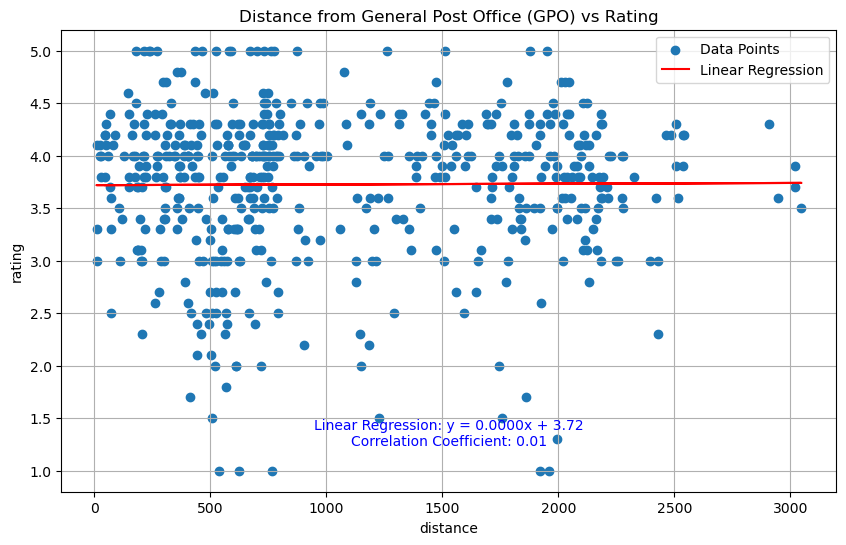

In [37]:
# Scatter Plot with Linear Regression for distance from General Post Office (GPO) vs rating

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['rating'], label='Data Points')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['distance'], df['rating'])

# Plot the linear regression line
x_values = df['distance']
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Linear Regression')

# Display linear regression equation and r-value
equation = f"Linear Regression: y = {slope:.4f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}"
plt.annotate(equation, xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Add labels and title
plt.xlabel('distance')
plt.ylabel('rating')
plt.title('Distance from General Post Office (GPO) vs Rating')
plt.legend()
plt.grid(True)
plt.show()

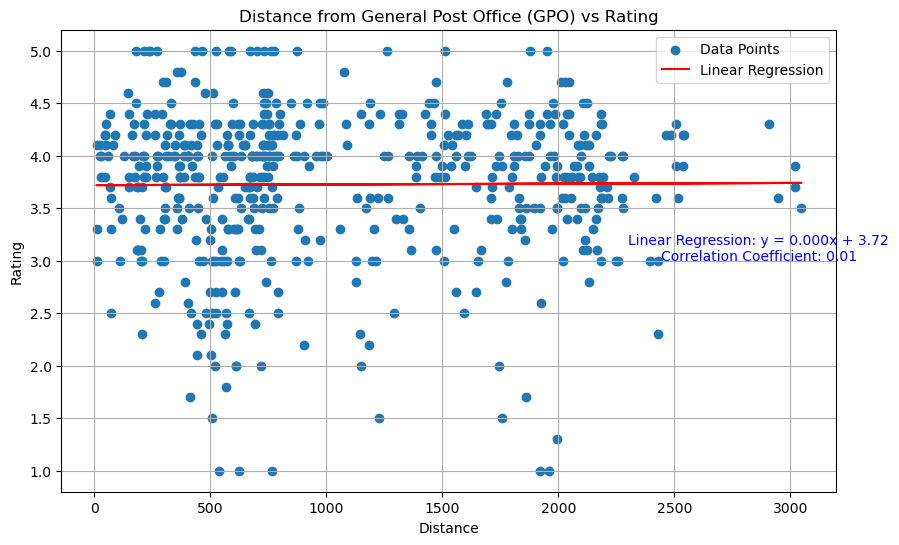

In [38]:
# Define a functio for having scatter Plot with Linear Regression for different variabls to avoid repetition
def plot_scatter_with_regression(df, x_column, y_column, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    plt.scatter(df[x_column], df[y_column], label='Data Points')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_column], df[y_column])

    # Plot the linear regression line
    x_values = df[x_column]
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='red', label='Linear Regression')

    # Display linear regression equation and r-value
    equation = f"Linear Regression: y = {slope:.3f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}"
    plt.annotate(equation, xy=(0.9, 0.5), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter Plot with Linear Regression for distance from General Post Office (GPO) vs rating by calling our function
plot_scatter_with_regression(df, 'distance', 'rating', 'Distance', 'Rating', 'Distance from General Post Office (GPO) vs Rating')

##### Analysis of correlation between rating and distance from GPO as a reference point:
The linear regression equation y=0.000x+3.72 indicates that there is virtually no slope (0.000) for the line. This suggests that there is almost no change in rating as the distance from the General Post Office (GPO) increases. 
The correlation coefficient (r=0.01) is very close to zero. A correlation coefficient close to zero indicates a very weak linear relationship between distance and rating. In this case, the correlation coefficient suggests that there is almost no linear correlation between the distance from the General Post Office (GPO) and the rating of the restaurants and bars in Perth.
In summary, based on the linear regression line and correlation coefficient there is almost no change in rating as the distance from the General Post Office (GPO) increases.
The correlation between distance and rating is very weak, indicating that there is almost no linear relationship between them.
This analysis suggests that factors other than distance from the General Post Office likely play a more significant role in determining the ratings of restaurants and bars in Perth.
The scatter plot is showing the closer to the GPO, the more counts of ratinging is recorded, it is because there are more restaurants and bars closer to the GPO.

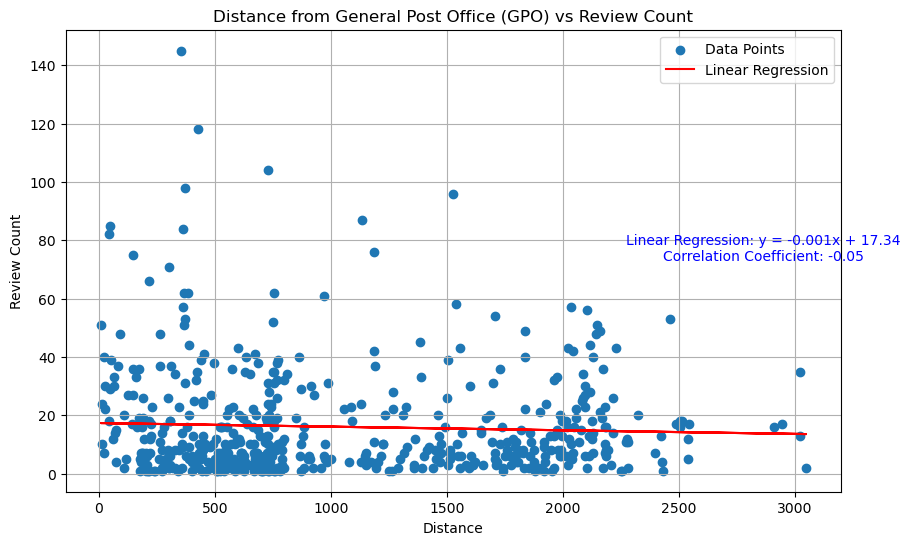

In [39]:
# Scatter Plot with Linear Regression for distance from General Post Office (GPO) vs rating by calling our function
plot_scatter_with_regression(df, 'distance', 'review_count', 'Distance', 'Review Count', 'Distance from General Post Office (GPO) vs Review Count')

##### Analysis of correlation between review count and distance from GPO as a reference point:
Similar to previous analysis, the linear regression equation y= - 0.001x+17.34 indicates that there is a very small slope (-0.001) for the line. This suggests that there is a slight decrease in review counts as the distance from the General Post Office (GPO) increases. 
The correlation coefficient (r=-0.05) is very close to zero. A correlation coefficient close to zero indicates a very weak linear relationship between distance and rating. In this case, the correlation coefficient suggests that there is almost no linear correlation between the distance from the General Post Office (GPO) and the review counts of the restaurants and bars in Perth.
In summary, based on the linear regression line and correlation coefficient there is almost no change in review count as the distance from the General Post Office (GPO) increases.
The correlation between distance and review count is very weak, indicating that there is almost no linear relationship between them.
This analysis suggests that factors other than distance from the General Post Office likely play a more significant role in determining the review counts of restaurants and bars in Perth.
Other factors such as food quality, service, ambiance, and overall customer experience may have a more significant impact on review counts.
The scatter plot is showing the closer to the GPO, the more counts of ratinging is recorded, it is because there are more restaurants and bars closer to the GPO.

### Interactive scatter plot to visualise the correlation between two variables

In [40]:
# Create dropdown widgets for selecting x-axis and y-axis variables
x_axis_dropdown = widgets.Dropdown(options=['distance', 'review_count'], description='X-axis:')
y_axis_dropdown = widgets.Dropdown(options=['rating', 'review_count'], description='Y-axis:')

# Define function to update the scatter plot based on dropdown selections
def update_scatter_plot(x_axis, y_axis):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_axis, y=y_axis, data=df, alpha=0.5)
    plt.xlabel(x_axis.capitalize())
    plt.ylabel(y_axis.capitalize())
    plt.title(f'{y_axis.capitalize()} vs {x_axis.capitalize()}')
    plt.show()

# Create interactive widget
interactive_plot = widgets.interactive(update_scatter_plot, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown)

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='X-axis:', options=('distance', 'review_count'), value='distance'),…

#### We already discussed the correlation of the mentioned variables in the previous part. This part provides a scatterplot to visualise the correlation between two variables. This is a user-interactive plot and will help the user to choose their desired variables from the dropdown.

### Q2.	How do different price levels correlate with the number of reviews? What is the impact of price level on customer satisfaction, review counts, and ratings distribution within the restaurant and bar industry?

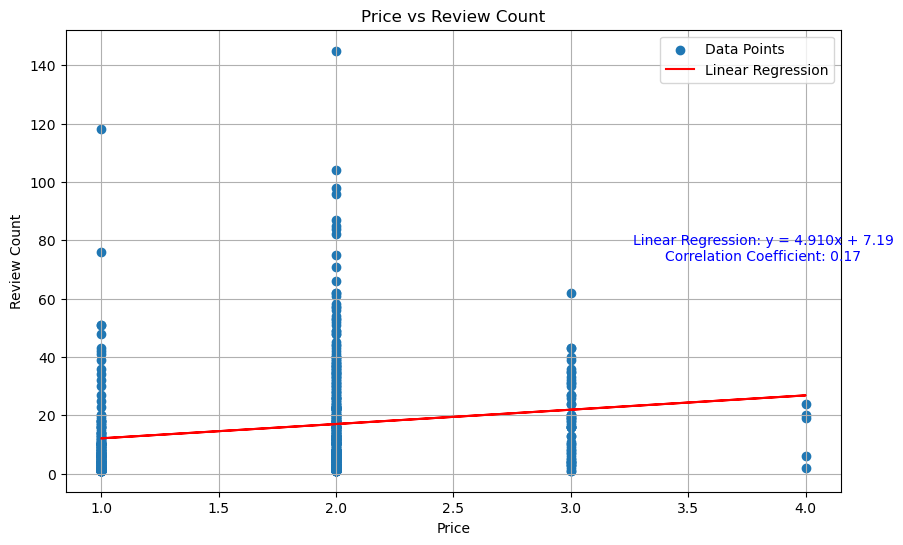

In [41]:
# Scatter Plot with Linear Regression for Price vs Review Count by calling our function
plot_scatter_with_regression(df, 'price_level', 'review_count','Price', 'Review Count', 'Price vs Review Count')

The slope of 4.91 suggests that for every one unit increase in the price level, the review count is expected to increase by 4.91 units. This indicates a positive relationship between the price level and the review count. However, the magnitude of this effect might be relatively small compared to the intercept.While the linear regression suggests a positive relationship between the price level and review count, the correlation coefficient(0.17) indicates that this relationship is weak. 

Plotting some bar charts will help us to find some answers for this question

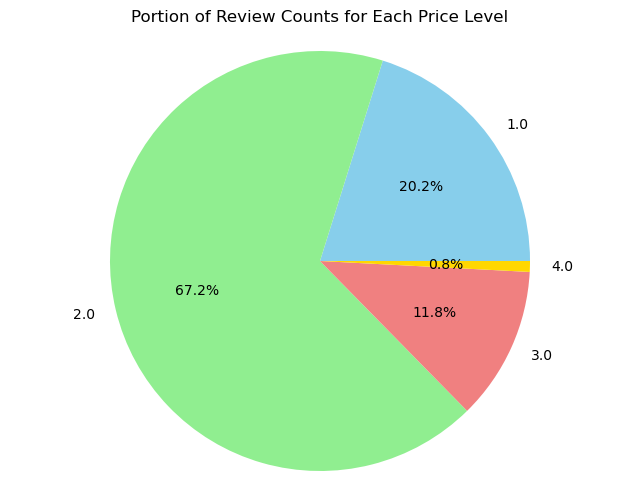

In [42]:
# Group the rows by price level and calculate the sum of review counts for each group
grouped_data = df.groupby('price_level')['review_count'].sum()

# Plot the grouped data as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle= 0, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Portion of Review Counts for Each Price Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart offers a concise and visual representation of how review counts are distributed among different price levels. Price level 2 with 67.2% is the largest slice indicates highest level of customer interaction and feedback, price level 1 with 20.2% is in the second place with a significant difference from price level 2, and price level 4 is the smallest slice which suggest the least level of engagement. 

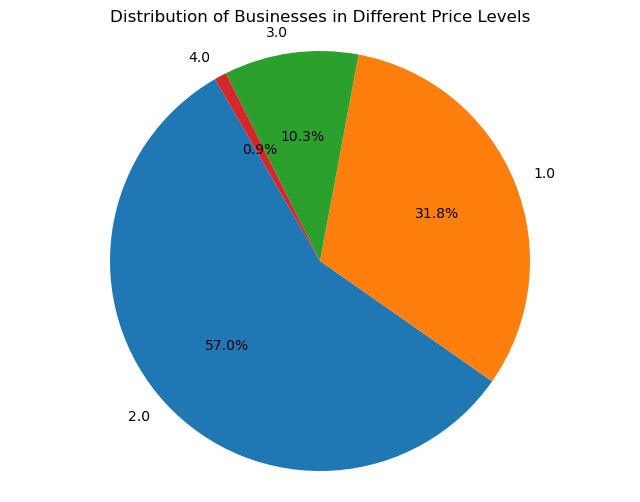

In [43]:
# Replace 'df' with your actual DataFrame name and 'price_level' with the correct column name if needed
price_level_counts = df['price_level'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(price_level_counts, labels=price_level_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Businesses in Different Price Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie chart shows that businesses in the price level 2, with 57% have the most counts, and businesses in price level 1, with 31.8% are in second place. This is also presented in the following bar charts for better comparison.

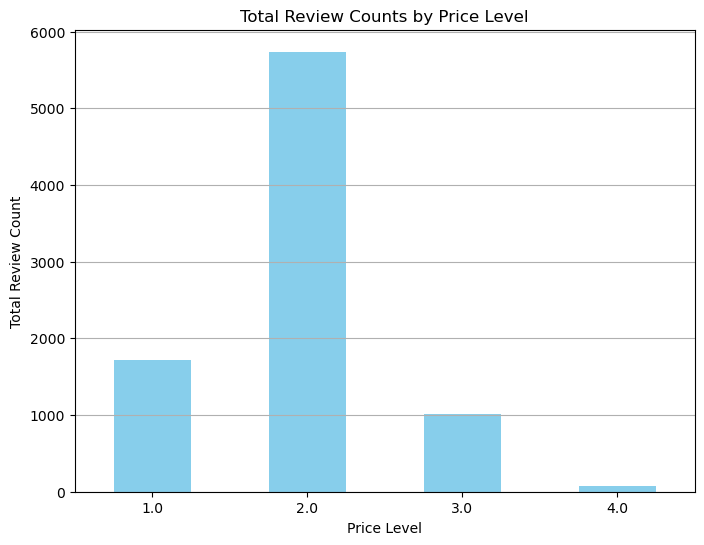

In [44]:
# Group the rows by price level and sum up the review counts in each group
review_count_by_price_level = df.groupby('price_level')['review_count'].sum()

# Plot the grouped data
plt.figure(figsize=(8, 6))
review_count_by_price_level.plot(kind='bar', color='skyblue')
plt.xlabel('Price Level')
plt.ylabel('Total Review Count')
plt.title('Total Review Counts by Price Level')
plt.xticks(rotation=0)  
plt.grid(axis='y')
plt.show()

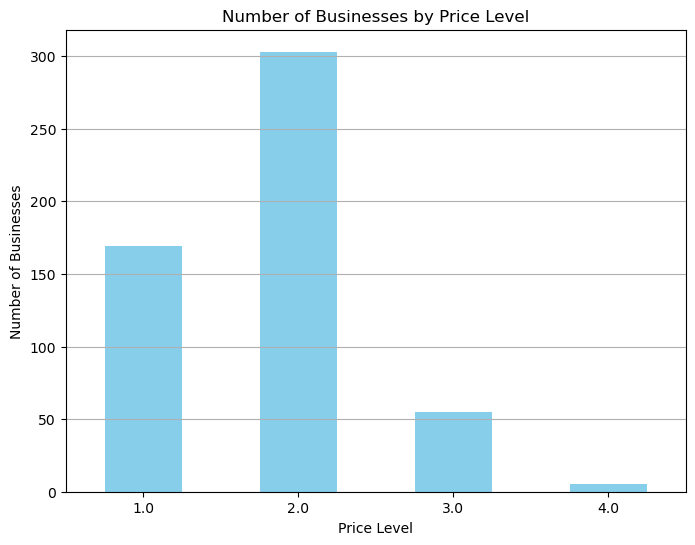

In [45]:
# Group the rows by price level and calculate the number of rows in each group
grouped_data = df.groupby('price_level').size()

# Plot the grouped data
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Price Level')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses by Price Level')
plt.xticks(rotation=0)  
plt.grid(axis='y')
plt.show()

Having a look at the above bar charts shows that price level 2 with a significant difference from other price levels attracts the most reviews around 6000 review counts, the price level 1 is in second place with around 2000 review counts. Higher review counts for price level 2 may indicates more customer interest or satisfaction. I will plot a bar chart to see which rating groups get the most review counts. 

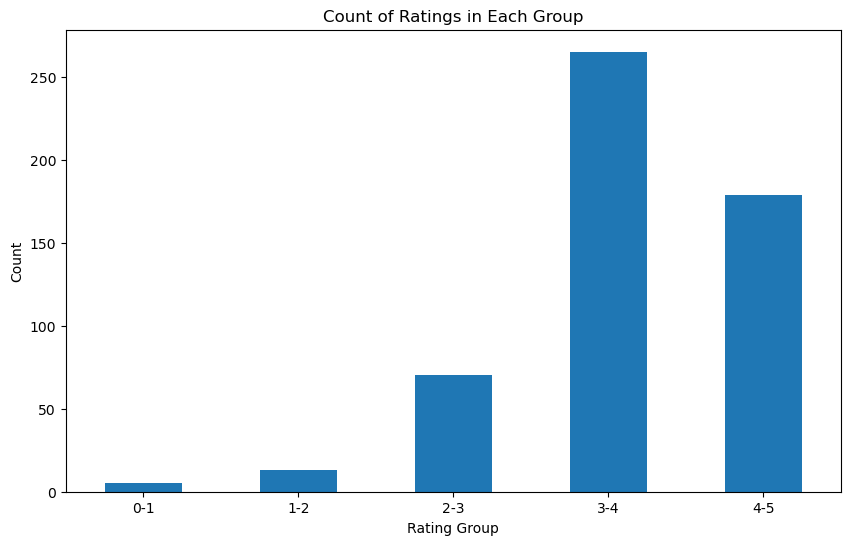

In [46]:
# Create a new column 'rating_group' to categorize ratings into specified bins
df['rating_group'] = pd.cut(df['rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

# Group the rows by 'rating_group' column and calculate the count of rows in each group
rating_counts = df['rating_group'].value_counts().sort_index(ascending=True)
                                                            
# Plotting the bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating Group')
plt.ylabel('Count')
plt.title('Count of Ratings in Each Group')
plt.xticks(rotation=0)
plt.show()

By grouping the rating and comparing the count of each rating group, we can see that higher ratings have the most counts. It showcases the the most reviews are showing the satisfaction of customers. 

Comparing the total review count with the number of businesses for each price level identifies price level 2 has higher review counts relative to the price level 1. It means even though the number of businesses with price level 2 is higher than businesses with price level 1 but there is a bigger difference between their total review count respectively. It is showing that price level is an important factor in customer satisfactio and engagement.  

In [47]:
# Don't forget to close the connection when you're done
conn.close()